In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa as tsa
%matplotlib inline

In [3]:
df = pd.read_excel('Dados de consumo.xlsx',parse_dates=['Data e Hora'])

In [4]:
df.head()

,Data e Hora,Consumo(litros),Valor Acumulado
0,2017-08-21 20:00:00,65,65
1,2017-08-21 21:00:00,81,146
2,2017-08-21 22:00:00,10,156
3,2017-08-21 23:00:00,12,168
4,2017-08-22 00:00:00,14,182


In [5]:
df.describe()

,Consumo(litros),Valor Acumulado
count,4033.000000,4033.000000
mean,28.234813,56183.710141
std,40.455402,32613.948469
min,0.000000,65.000000
25%,0.000000,27774.000000
50%,10.000000,56707.000000
75%,43.000000,83971.000000
max,550.000000,113871.000000


In [6]:
df['Data e Hora'] = pd.to_datetime(df['Data e Hora'])
df['Data'] = df['Data e Hora'].dt.strftime('%Y-%m-%d')
df['Hora'] = df['Data e Hora'].dt.strftime('%H:%M:%S')
df['Semana'] = df['Data e Hora'].dt.strftime('%A')

In [7]:
df.head()

,Data e Hora,Consumo(litros),Valor Acumulado,Data,Hora,Semana
0,2017-08-21 20:00:00,65,65,2017-08-21,20:00:00,Monday
1,2017-08-21 21:00:00,81,146,2017-08-21,21:00:00,Monday
2,2017-08-21 22:00:00,10,156,2017-08-21,22:00:00,Monday
3,2017-08-21 23:00:00,12,168,2017-08-21,23:00:00,Monday
4,2017-08-22 00:00:00,14,182,2017-08-22,00:00:00,Tuesday


In [8]:
del df['Data e Hora']

In [9]:
df.head()

,Consumo(litros),Valor Acumulado,Data,Hora,Semana
0,65,65,2017-08-21,20:00:00,Monday
1,81,146,2017-08-21,21:00:00,Monday
2,10,156,2017-08-21,22:00:00,Monday
3,12,168,2017-08-21,23:00:00,Monday
4,14,182,2017-08-22,00:00:00,Tuesday


In [10]:
df=df[['Data','Hora','Semana','Consumo(litros)','Valor Acumulado']]

In [11]:
df.head()

,Data,Hora,Semana,Consumo(litros),Valor Acumulado
0,2017-08-21,20:00:00,Monday,65,65
1,2017-08-21,21:00:00,Monday,81,146
2,2017-08-21,22:00:00,Monday,10,156
3,2017-08-21,23:00:00,Monday,12,168
4,2017-08-22,00:00:00,Tuesday,14,182


correlação

In [12]:
df.corr()

,Consumo(litros),Valor Acumulado
Consumo(litros),1.000000,0.017014
Valor Acumulado,0.017014,1.000000


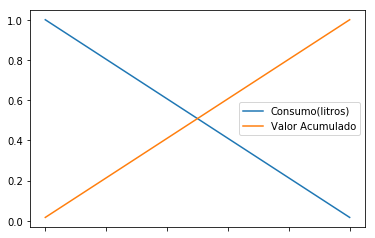

In [13]:
df[['Consumo(litros)','Valor Acumulado']].corr().plot()

correlação não linear

In [14]:
df.corr('spearman')

,Consumo(litros),Valor Acumulado
Consumo(litros),1.000000,-0.023967
Valor Acumulado,-0.023967,1.000000


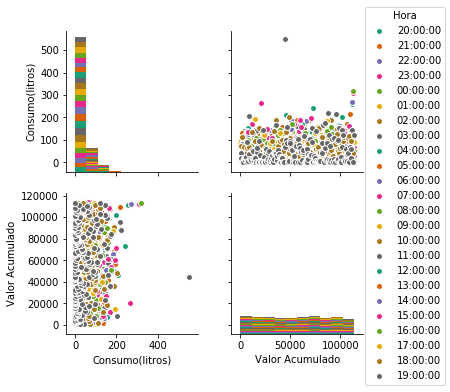

In [15]:
sns.pairplot(df,hue='Hora',palette="Dark2")

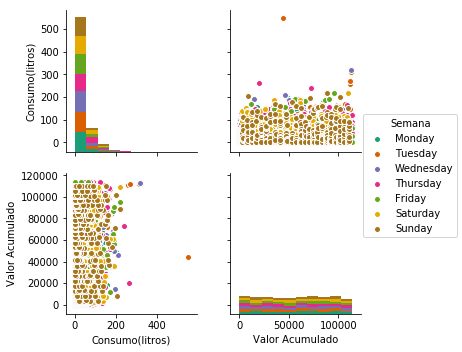

In [16]:
sns.pairplot(df,hue='Semana',palette="Dark2")

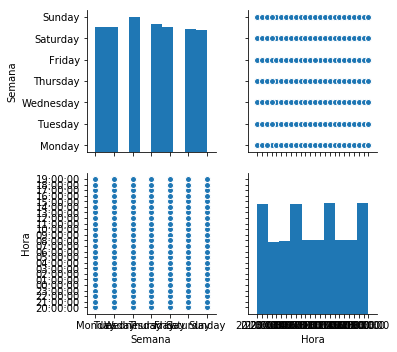

In [17]:
sns.pairplot(df,vars=["Semana", "Hora"])

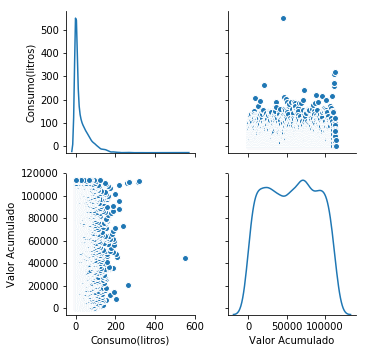

In [18]:
sns.pairplot(df, diag_kind="kde")

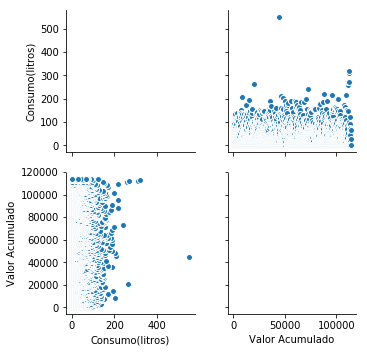

In [19]:
sns.pairplot(df, diag_kind="reg")

In [20]:
df_pivot_table=df.pivot_table(df,index=['Data','Semana'])
df_pivot_table.head()

,,Consumo(litros),Valor Acumulado
Data,Semana,,
2017-08-21,Monday,42.000000,133.750000
2017-08-22,Tuesday,20.166667,320.375000
2017-08-23,Wednesday,30.833333,975.333333
2017-08-24,Thursday,31.565217,1624.739130
2017-08-25,Friday,19.875000,2412.916667


plt.figure(figsize=(15,5))
plt.plot()

plt.figure(figsize=(15,5))
plt.plot(df['Semana']=='Monday', df['Consumo(litros)'])

plt.figure(figsize=(15,5))
plt.plot( df['Consumo(litros)'])

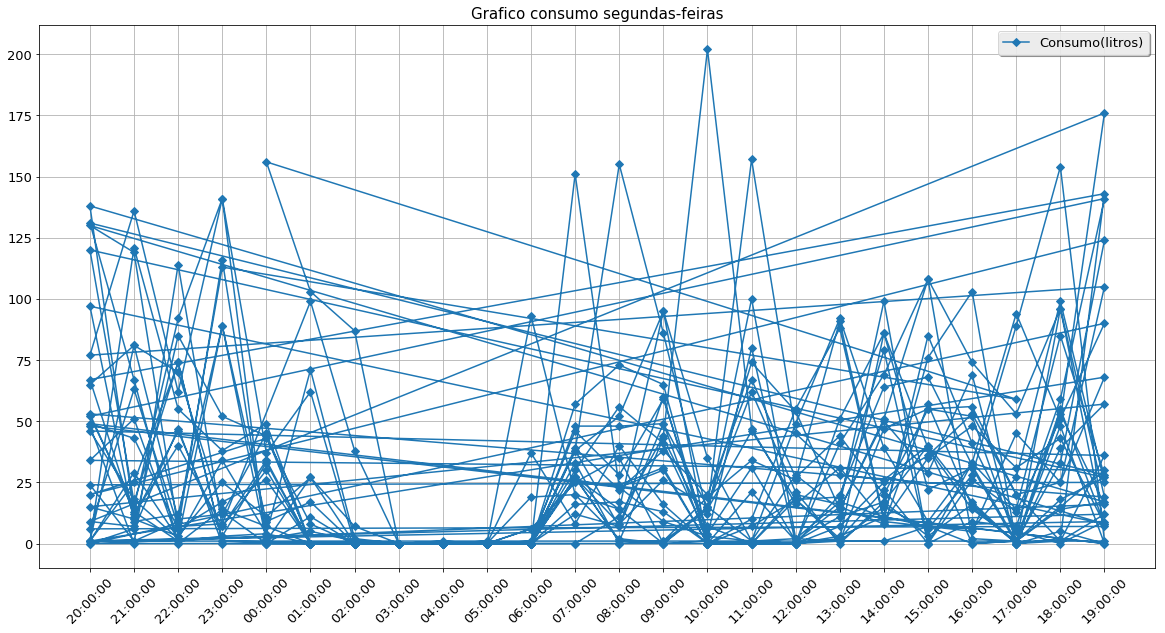

In [24]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Semana']=='Monday'], df['Consumo(litros)'][df['Semana']=='Monday'],marker='D')

plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico consumo segundas-feiras',fontsize='15')
plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,fontsize='13').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
#plt.savefig('figura_resultado2.png')


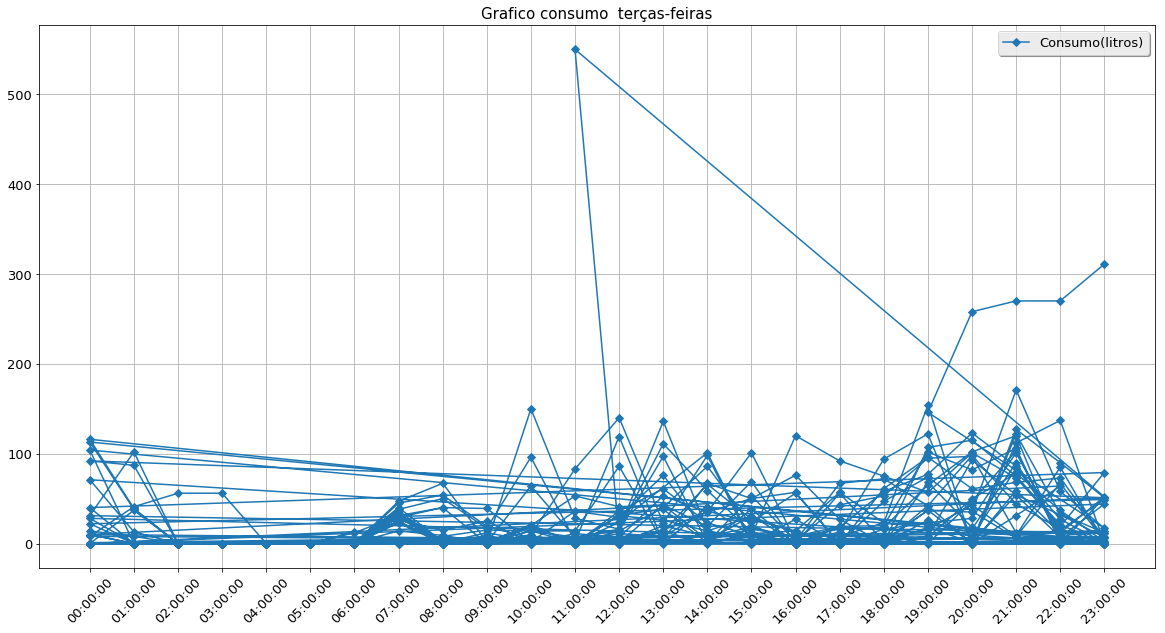

In [25]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Semana']=='Tuesday'], df['Consumo(litros)'][df['Semana']=='Tuesday'],marker='D')

plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico consumo  terças-feiras',fontsize='15')
plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,fontsize='13').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
#plt.savefig('figura_resultado2.png')

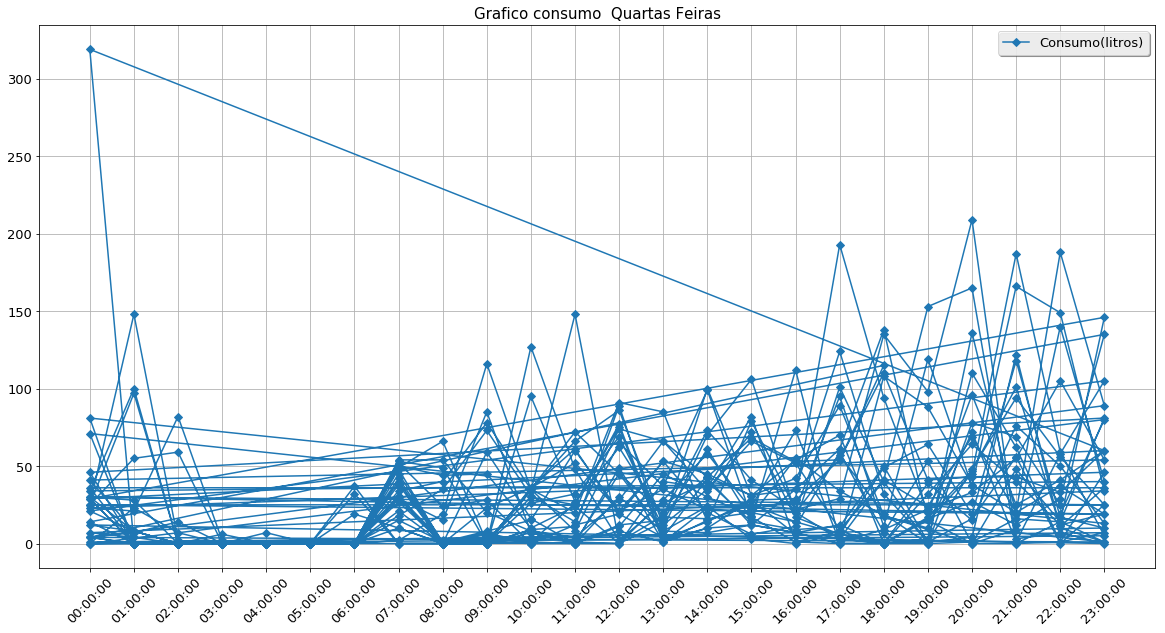

In [26]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Semana']=='Wednesday'], df['Consumo(litros)'][df['Semana']=='Wednesday'],marker='D')

plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico consumo  Quartas Feiras',fontsize='15')
plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,fontsize='13').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
#plt.savefig('figura_resultado2.png')

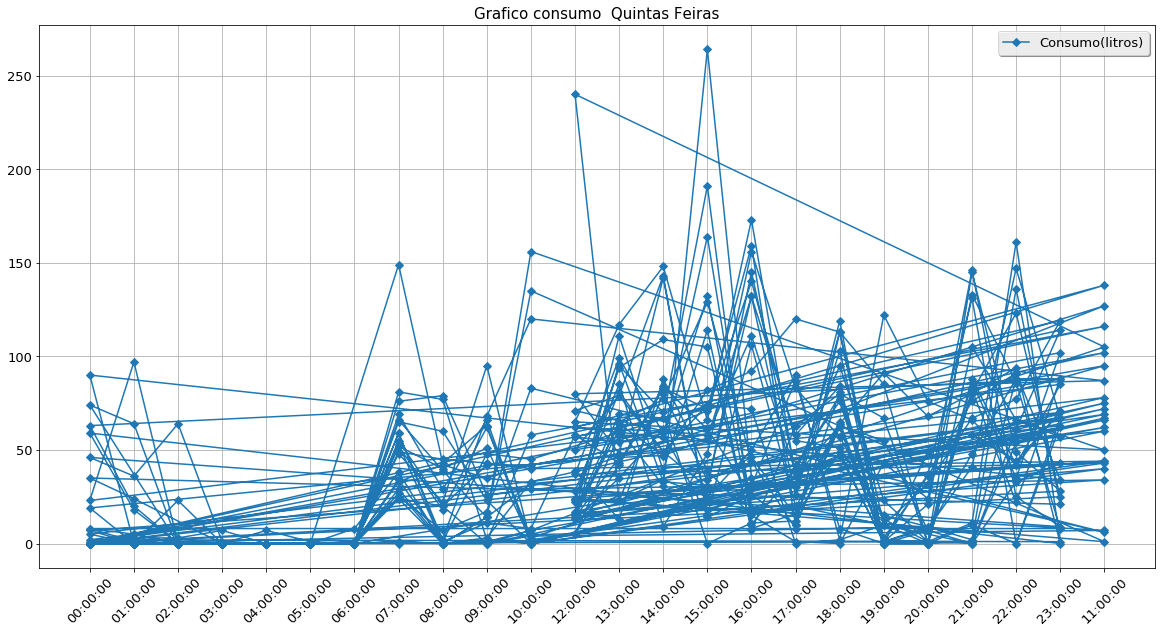

In [27]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Semana']=='Thursday'], df['Consumo(litros)'][df['Semana']=='Thursday'],marker='D')

plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico consumo  Quintas Feiras',fontsize='15')
plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,fontsize='13').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
#plt.savefig('figura_resultado2.png')

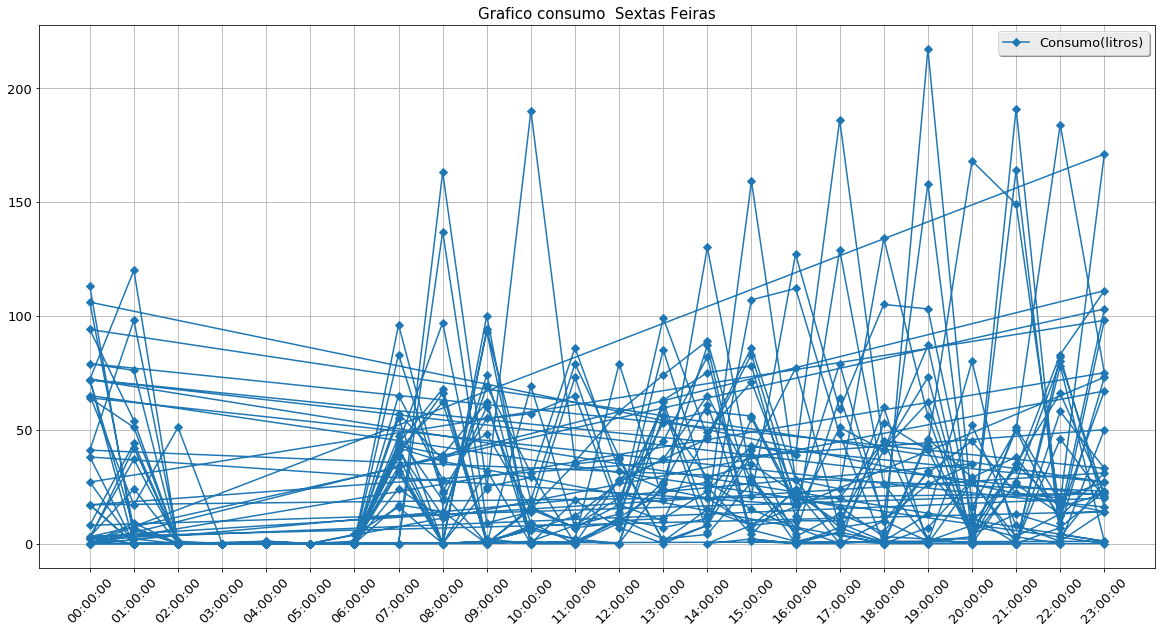

In [28]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Semana']=='Friday'], df['Consumo(litros)'][df['Semana']=='Friday'],marker='D')

plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico consumo  Sextas Feiras',fontsize='15')
plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,fontsize='13').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
#plt.savefig('figura_resultado2.png')

In [29]:
df['Data'][df['Semana']=='Monday'].head()

0      2017-08-21
1      2017-08-21
2      2017-08-21
3      2017-08-21
147    2017-08-28
Name: Data, dtype: object

In [30]:
df['Data'][df['Semana']=='Tuesday'].head()

4    2017-08-22
5    2017-08-22
6    2017-08-22
7    2017-08-22
8    2017-08-22
Name: Data, dtype: object

In [31]:
df['Data'][df['Semana']=='Tuesday'].tail()

3968    2018-05-15
3969    2018-05-15
3970    2018-05-15
3971    2018-05-15
3972    2018-05-15
Name: Data, dtype: object

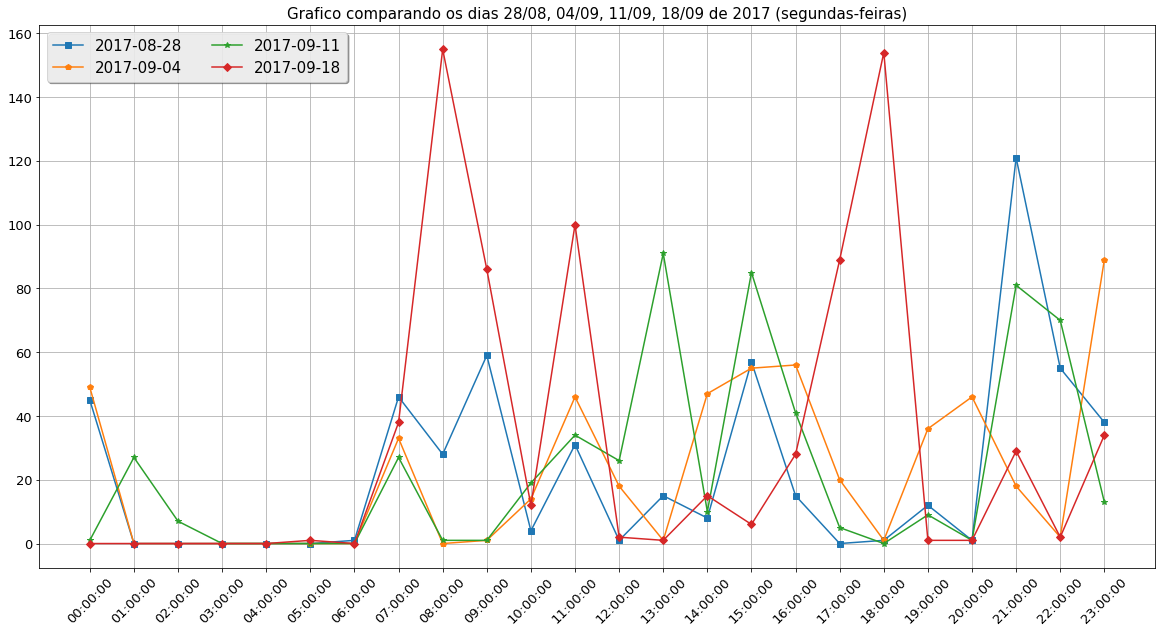

In [32]:
plt.figure(figsize=(20,10))
#plt.plot(df['Hora'][df['Data']=='2017-08-21'], df['Consumo(litros)'][df['Data']=='2017-08-21'])
plt.plot(df['Hora'][df['Data']=='2017-08-28'], df['Consumo(litros)'][df['Data']=='2017-08-28'],marker='s')
plt.plot(df['Hora'][df['Data']=='2017-09-04'], df['Consumo(litros)'][df['Data']=='2017-09-04'],marker='p')
plt.plot(df['Hora'][df['Data']=='2017-09-11'], df['Consumo(litros)'][df['Data']=='2017-09-11'],marker='*')
plt.plot(df['Hora'][df['Data']=='2017-09-18'], df['Consumo(litros)'][df['Data']=='2017-09-18'],marker='D')
#plt.legend(loc='upper left')
plt.grid(True)
plt.legend(["2017-08-28", "2017-09-04",'2017-09-11','2017-09-18'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='15').get_frame().set_alpha(0.8)
#plt.legend( ["2017-08-28", "2017-09-04",'2017-09-11','2017-09-18'])
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico comparando os dias 28/08, 04/09, 11/09, 18/09 de 2017 (segundas-feiras)',fontsize='15')
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('figura_resultado1.png')

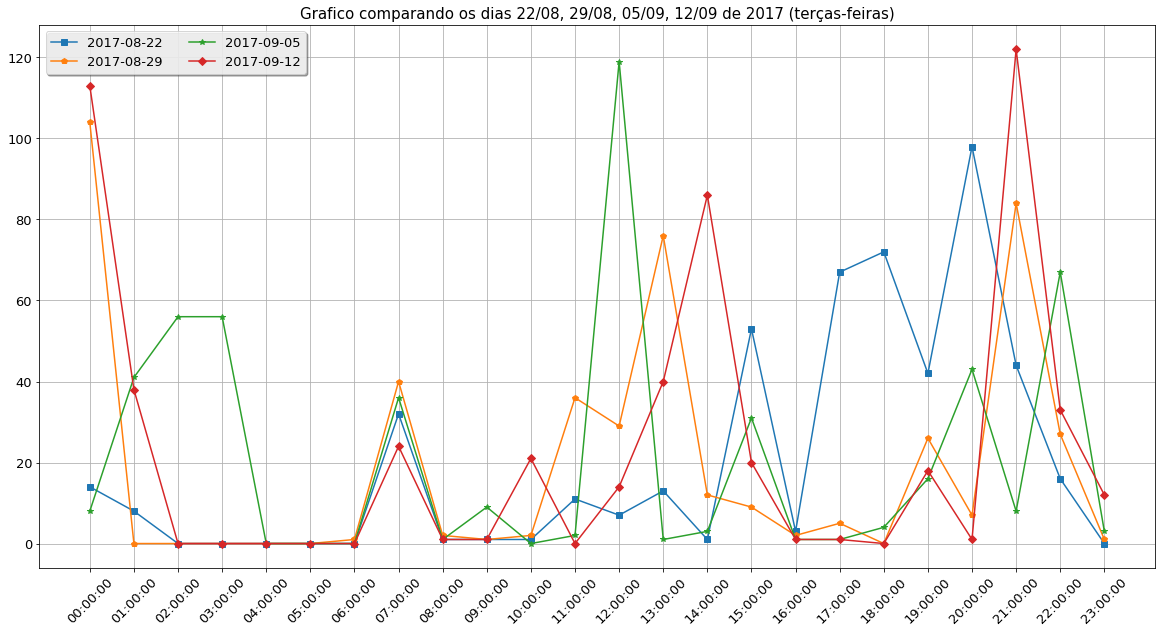

In [33]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Data']=='2017-08-22'], df['Consumo(litros)'][df['Data']=='2017-08-22'],marker='s')
plt.plot(df['Hora'][df['Data']=='2017-08-29'], df['Consumo(litros)'][df['Data']=='2017-08-29'],marker='p')
plt.plot(df['Hora'][df['Data']=='2017-09-05'], df['Consumo(litros)'][df['Data']=='2017-09-05'],marker='*')
plt.plot(df['Hora'][df['Data']=='2017-09-12'], df['Consumo(litros)'][df['Data']=='2017-09-12'],marker='D')

plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico comparando os dias 22/08, 29/08, 05/09, 12/09 de 2017 (terças-feiras)',fontsize='15')
plt.legend(["2017-08-22", "2017-08-29",'2017-09-05','2017-09-12'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='13').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('figura_resultado2.png')

plt.figure(figsize=(20,5))
for i in df['Data']:
    for e in df['Semana']:
        if e == 'Monday':
            plt.plot(df['Hora'][df['Data']==i], df['Consumo(litros)'][df['Data']==i])

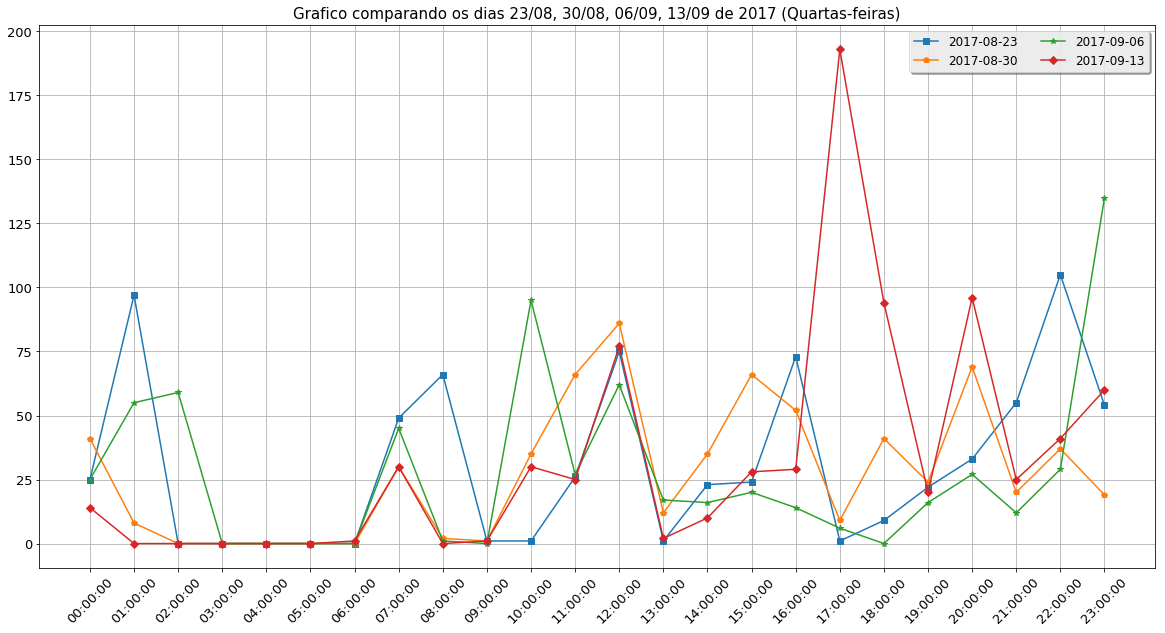

In [34]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Data']=='2017-08-23'], df['Consumo(litros)'][df['Data']=='2017-08-23'],marker='s')
plt.plot(df['Hora'][df['Data']=='2017-08-30'], df['Consumo(litros)'][df['Data']=='2017-08-30'],marker='p')
plt.plot(df['Hora'][df['Data']=='2017-09-06'], df['Consumo(litros)'][df['Data']=='2017-09-06'],marker='*')
plt.plot(df['Hora'][df['Data']=='2017-09-13'], df['Consumo(litros)'][df['Data']=='2017-09-13'],marker='D')
#plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico comparando os dias 23/08, 30/08, 06/09, 13/09 de 2017 (Quartas-feiras)',fontsize='15')
plt.legend(["2017-08-23", "2017-08-30",'2017-09-06','2017-09-13'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='12').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('figura_resultado3.png')

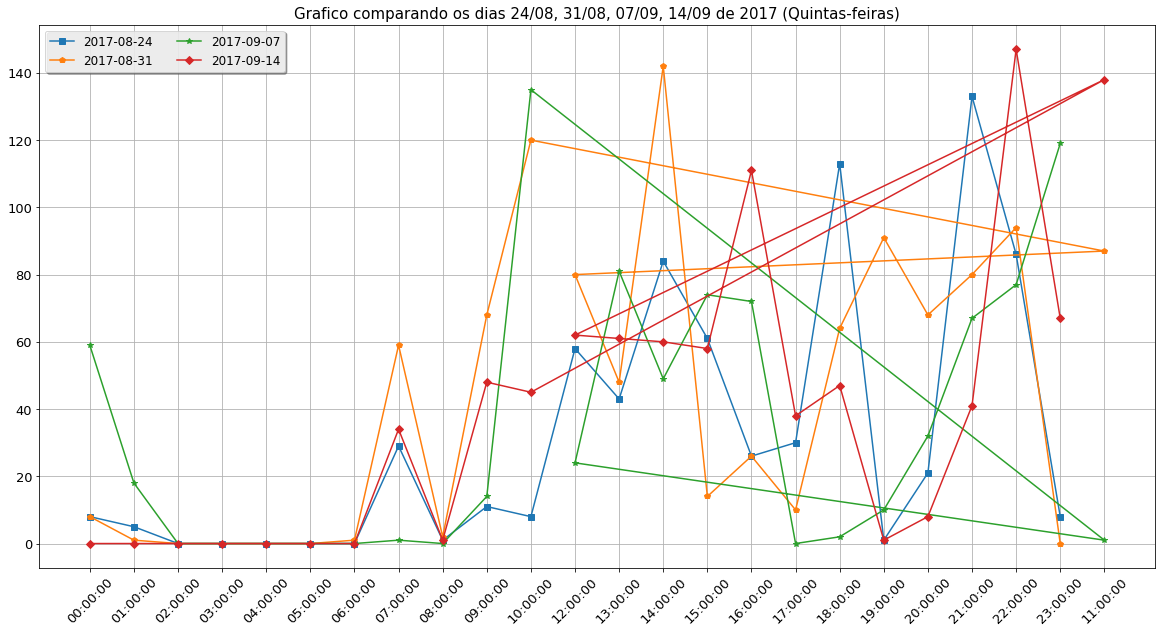

In [35]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Data']=='2017-08-24'], df['Consumo(litros)'][df['Data']=='2017-08-24'],marker='s')
plt.plot(df['Hora'][df['Data']=='2017-08-31'], df['Consumo(litros)'][df['Data']=='2017-08-31'],marker='p')
plt.plot(df['Hora'][df['Data']=='2017-09-07'], df['Consumo(litros)'][df['Data']=='2017-09-07'],marker='*')
plt.plot(df['Hora'][df['Data']=='2017-09-14'], df['Consumo(litros)'][df['Data']=='2017-09-14'],marker='D')
#plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico comparando os dias 24/08, 31/08, 07/09, 14/09 de 2017 (Quintas-feiras)',fontsize='15')
plt.legend(["2017-08-24", "2017-08-31",'2017-09-07','2017-09-14'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='12').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('figura_resultado4.png')

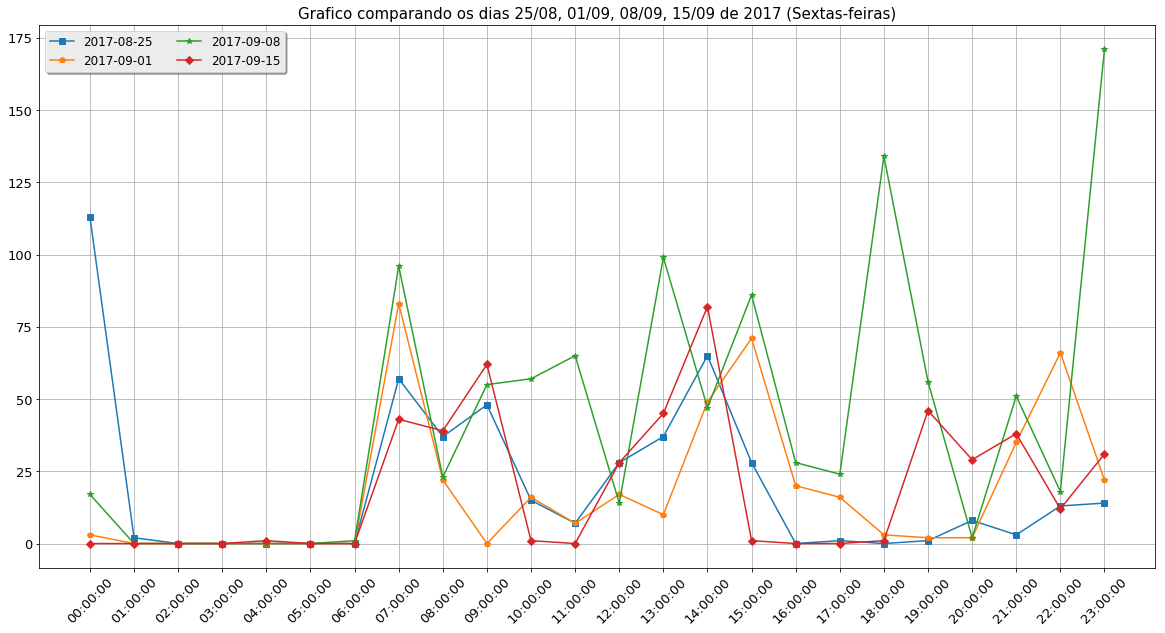

In [36]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Data']=='2017-08-25'], df['Consumo(litros)'][df['Data']=='2017-08-25'],marker='s')
plt.plot(df['Hora'][df['Data']=='2017-09-01'], df['Consumo(litros)'][df['Data']=='2017-09-01'],marker='p')
plt.plot(df['Hora'][df['Data']=='2017-09-08'], df['Consumo(litros)'][df['Data']=='2017-09-08'],marker='*')
plt.plot(df['Hora'][df['Data']=='2017-09-15'], df['Consumo(litros)'][df['Data']=='2017-09-15'],marker='D')
#plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico comparando os dias 25/08, 01/09, 08/09, 15/09 de 2017 (Sextas-feiras)',fontsize='15')
plt.legend(["2017-08-25", "2017-09-01",'2017-09-08','2017-09-15'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='12').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('figura_resultado5.png')

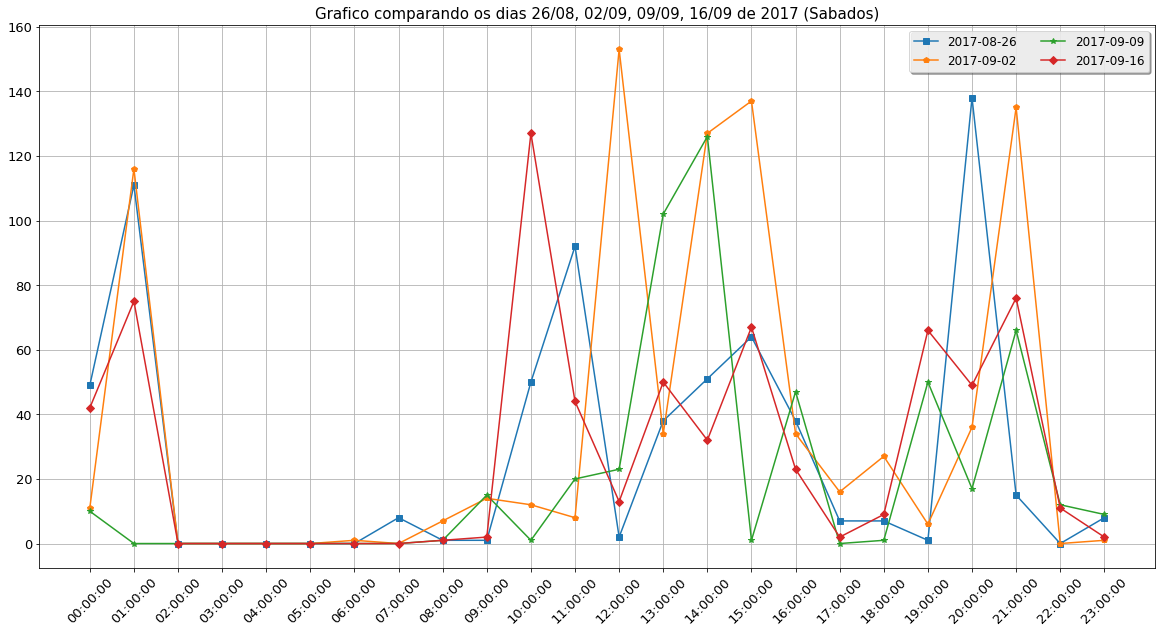

In [37]:
plt.figure(figsize=(20,10))
plt.plot(df['Hora'][df['Data']=='2017-08-26'], df['Consumo(litros)'][df['Data']=='2017-08-26'],marker='s')
plt.plot(df['Hora'][df['Data']=='2017-09-02'], df['Consumo(litros)'][df['Data']=='2017-09-02'],marker='p')
plt.plot(df['Hora'][df['Data']=='2017-09-09'], df['Consumo(litros)'][df['Data']=='2017-09-09'],marker='*')
plt.plot(df['Hora'][df['Data']=='2017-09-16'], df['Consumo(litros)'][df['Data']=='2017-09-16'],marker='D')
#plt.legend(loc='upper left')
plt.grid(True)
plt.xticks( rotation=45,fontsize='13')
plt.yticks(fontsize='13')
plt.title('Grafico comparando os dias 26/08, 02/09, 09/09, 16/09 de 2017 (Sabados)',fontsize='15')
plt.legend(["2017-08-26", "2017-09-02",'2017-09-09','2017-09-16'],loc='best', ncol=2, shadow=True, fancybox=True,fontsize='12').get_frame().set_alpha(0.8)
#fig = plt.figure()
#fig=figura_resultado.get_figure()
plt.savefig('figura_resultado6.png')

Distancia euclidiana entre as duas datas 22/08/2017 e 29/08/2017

In [38]:
df['Consumo(litros)'][df['Data']=='2017-09-14']

555      0
556      0
557      0
558      0
559      0
560      0
561      0
562     34
563      1
564     48
565     45
566    138
567     62
568     61
569     60
570     58
571    111
572     38
573     47
574      1
575      8
576     41
577    147
578     67
Name: Consumo(litros), dtype: int64

In [39]:
df.loc[555:578,'Consumo(litros)']

555      0
556      0
557      0
558      0
559      0
560      0
561      0
562     34
563      1
564     48
565     45
566    138
567     62
568     61
569     60
570     58
571    111
572     38
573     47
574      1
575      8
576     41
577    147
578     67
Name: Consumo(litros), dtype: int64

Distancia euclidiana entre dados de duas datas 22/08/2017 e 29/08/2017

In [40]:
v1= df['Consumo(litros)'][df['Data']=='2017-08-22']
v2=df['Consumo(litros)'][df['Data']=='2017-08-29']
def dist_euclidiana_np(v1, v2):
    # v1= np.array(v1)
    # v2 = np.array(v2)
	#variavel v1 recebe vetor v1
    v1, v2 = np.array(v1), np.array(v2)
	#diferenca entre os elementos 
    dif = v1 - v2
	#multiplicaçao entre os elementos
    quad_dist = np.dot(dif, dif)
    return math.sqrt(quad_dist)


print('Distancia Numpy %.2f' % dist_euclidiana_np(v1, v2))
print('Distancia Numpy {:.2f}' .format(dist_euclidiana_np(v1, v2)))


Distancia Numpy 186.16
Distancia Numpy 186.16


Distancia euclidiana entre dados de duas datas 29/08/2017 e 05/09/2017

In [41]:
v1= df['Consumo(litros)'][df['Data']=='2017-08-29']
v2=df['Consumo(litros)'][df['Data']=='2017-09-05']
def dist_euclidiana_np(v1, v2):
    # v1= np.array(v1)
    # v2 = np.array(v2)
	#variavel v1 recebe vetor v1
    v1, v2 = np.array(v1), np.array(v2)
	#diferenca entre os elementos 
    dif = v1 - v2
	#multiplicaçao entre os elementos
    quad_dist = np.dot(dif, dif)
    return math.sqrt(quad_dist)


print('Distancia Numpy %.2f' % dist_euclidiana_np(v1, v2))

Distancia Numpy 203.74


Distancia euclidiana entre as duas datas 29/08/2017 e 05/09/2017

In [42]:
v1= df['Consumo(litros)'][df['Data']=='2017-08-29']
v2=df['Consumo(litros)'][df['Data']=='2017-09-05']
from scipy.spatial import distance
#a = (1, 2, 3)
#b = (4, 5, 6)
dst = distance.euclidean(v1,v2)
print('Distancia Euclidiana {:.2f}'.format(dst))

Distancia Euclidiana 203.74


Distancia euclidiana entre as semanas 22/08/2017 - 28/08/2017 e 29/08/2017 - 04/09/2017

In [43]:
v1=df.loc[3:170,'Consumo(litros)']
v2=df.loc[171:338,'Consumo(litros)']
from scipy.spatial import distance
#print(f'distanci euclidiana\n{v1}')
dst = distance.euclidean(v1,v2)
print('Distancia Euclidiana {:.2f}'.format(dst))

Distancia Euclidiana 557.59


In [44]:
v1=df.loc[3:170,'Consumo(litros)']
v2=df.loc[171:338,'Consumo(litros)']
def dist_euclidiana_np(v1, v2):
    # v1= np.array(v1)
    # v2 = np.array(v2)
	#variavel v1 recebe vetor v1
    v1, v2 = np.array(v1), np.array(v2)
	#diferenca entre os elementos 
    dif = v1 - v2
	#multiplicaçao entre os elementos
    quad_dist = np.dot(dif, dif)
    return math.sqrt(quad_dist)


print('Distancia Numpy %.2f' % dist_euclidiana_np(v1, v2))
print('Distancia Numpy {:.2f}' .format(dist_euclidiana_np(v1, v2)))

Distancia Numpy 557.59
Distancia Numpy 557.59


In [45]:
df['Consumo(litros)'][df['Data']=='2017-08-26'].count()

24

v1= (df['Consumo(litros)'][df['Data']=='2017-08-22'],df['Consumo(litros)'][df['Data']=='2017-08-23'],df['Consumo(litros)'][df['Data']=='2017-08-24']
    ,df['Consumo(litros)'][df['Data']=='2017-08-25'],df['Consumo(litros)'][df['Data']=='2017-08-26'],df['Consumo(litros)'][df['Data']=='2017-08-27']
    ,df['Consumo(litros)'][df['Data']=='2017-08-28'])
v2= (df['Consumo(litros)'][df['Data']=='2017-08-29'],df['Consumo(litros)'][df['Data']=='2017-08-30'],df['Consumo(litros)'][df['Data']=='2017-08-31']
    ,df['Consumo(litros)'][df['Data']=='2017-09-01'],df['Consumo(litros)'][df['Data']=='2017-09-02'],df['Consumo(litros)'][df['Data']=='2017-09-03']
    ,df['Consumo(litros)'][df['Data']=='2017-09-04'])
from scipy.spatial import distance
#print(f'distanci euclidiana\n{v1}')
dst = distance.euclidean(v1,v2)
print('Distancia Euclidiana {:.2f}'.format(dst))

df['Consumo(litros)'][[df['Data'][df['Semana']=='Monday']]]

In [47]:
df['Data'][df['Semana']=='Monday'].head()

0      2017-08-21
1      2017-08-21
2      2017-08-21
3      2017-08-21
147    2017-08-28
Name: Data, dtype: object

In [48]:
df_teste=df['Consumo(litros)'][df['Semana']=='Monday']==df['Data'][df['Semana']=='Monday']

In [49]:
df_teste.head()

0      False
1      False
2      False
3      False
147    False
dtype: bool

In [50]:
df['Data'][df['Semana']=='Monday']==df['Data'][df['Semana']=='Monday']

0       True
1       True
2       True
3       True
147     True
148     True
149     True
150     True
151     True
152     True
153     True
154     True
155     True
156     True
157     True
158     True
159     True
160     True
161     True
162     True
163     True
164     True
165     True
166     True
167     True
168     True
169     True
170     True
315     True
316     True
        ... 
3810    True
3811    True
3812    True
3813    True
3814    True
3815    True
3816    True
3945    True
3946    True
3947    True
3948    True
3949    True
3950    True
3951    True
3952    True
3953    True
3954    True
3955    True
3956    True
3957    True
3958    True
3959    True
3960    True
3961    True
3962    True
3963    True
3964    True
3965    True
3966    True
3967    True
Name: Data, Length: 569, dtype: bool